In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('poster')
sns.set(style='white', rc={'figure.figsize':(12,8)})

import os
import requests

import umap
import MulticoreTSNE

In [16]:
if not os.path.exists('shuttle.trn'):
    results = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.trn.Z')
    with open('shuttle.trn.Z', 'wb') as train:
        train.write(results.content)
    !uncompress shuttle.trn.Z
    results = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst')
    with open('shuttle.tst', 'wb') as test:
        test.write(results.content)

In [25]:
shuttle_train = np.loadtxt('shuttle.trn')
shuttle_test = np.loadtxt('shuttle.tst')
shuttle = np.vstack([shuttle_train, shuttle_test])
data = shuttle[:,:-1]
target = shuttle[:,-1]
data.shape

(58000, 9)

In [26]:
shuttle

array([[ 50.,  21.,  77., ...,  48.,  22.,   2.],
       [ 55.,   0.,  92., ...,  92.,  56.,   4.],
       [ 53.,   0.,  82., ...,  30.,   2.,   1.],
       ...,
       [ 55.,   0.,  77., ...,  65.,  42.,   4.],
       [ 37.,   0., 103., ...,  85.,  20.,   1.],
       [ 56.,   2.,  98., ...,  46.,   4.,   4.]])

In [18]:
%%time
embedding = umap.UMAP(random_state=42).fit_transform(data)

CPU times: user 2min 17s, sys: 6.94 s, total: 2min 24s
Wall time: 1min 39s


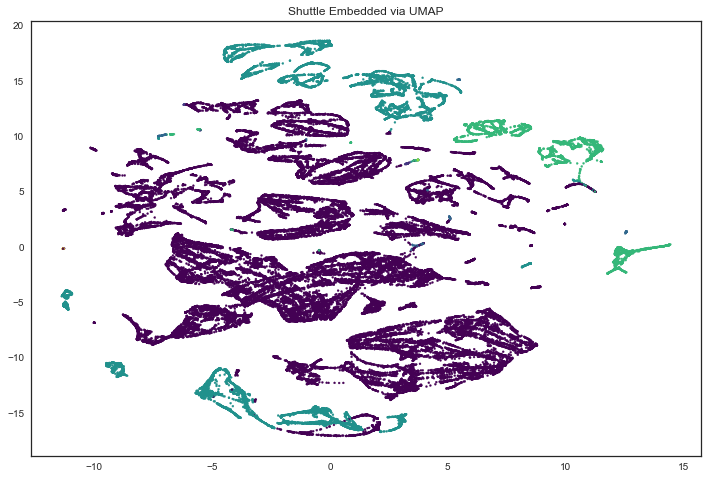

In [27]:
plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap="viridis", s=4)
plt.title('Shuttle Embedded via UMAP');